# This document contains examples of creating plots from data

In [20]:
import sys
sys.path.insert(0, '../src/')

import pandas as pd
import matplotlib.pyplot as plt
import outputComparison as oc
from bisect import bisect_right
from scipy.interpolate import interp1d
from scipy.signal import correlate
import numpy
%matplotlib notebook

In [2]:
no_lut_file = '../datasets/2019_02_13-on-ZedBoard/short_simple_synapse_no_lut_2019_02_13'
#no_lut_file = '../datasets/2019_02_04-on-ZedBoard/simple_synapse_no_lut_2019_02_04'
no_lut = pd.read_csv(no_lut_file + '.csv',
                 names=['time', 'v1', 'v2'])

hard_lut_file = '../datasets/2019_02_13-on-ZedBoard/short_simple_synapse_hard_lut_2019_02_13'
#hard_lut_file = '../datasets/2019_02_04-on-ZedBoard/simple_synapse_hard_lut_2019_02_04'
hard_lut = pd.read_csv(hard_lut_file + '.csv',
                 names=['time', 'v1', 'v2'])

soft_lut_file = '../datasets/2019_02_13-on-ZedBoard/short_simple_synapse_soft_lut_2019_02_13'
soft_lut = pd.read_csv(soft_lut_file + '.csv',
                 names=['time', 'v1', 'v2'])

## Multiple plots

<IPython.core.display.Javascript object>


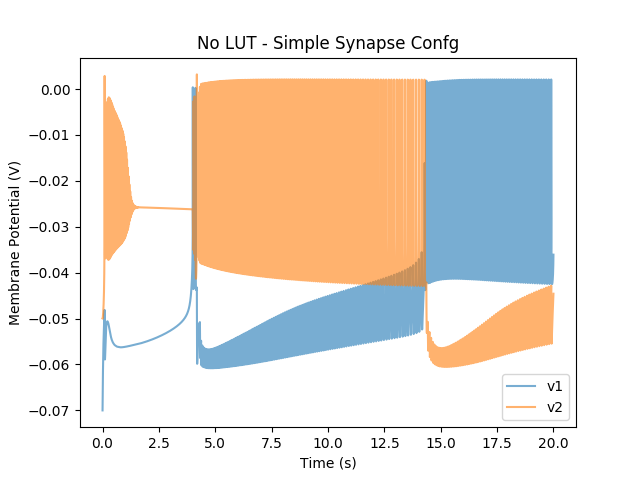

<IPython.core.display.Javascript object>


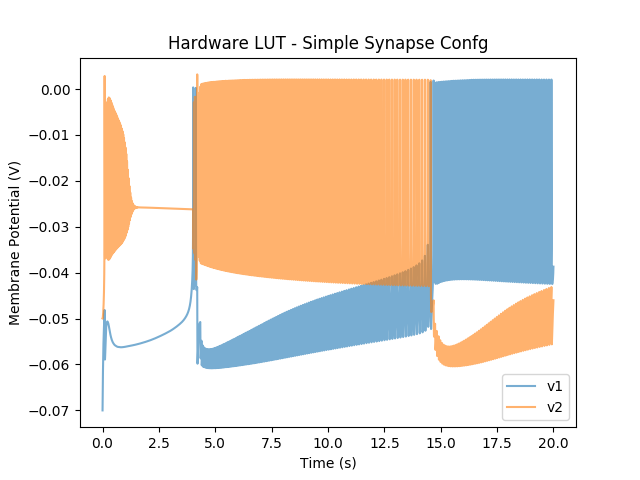

<IPython.core.display.Javascript object>


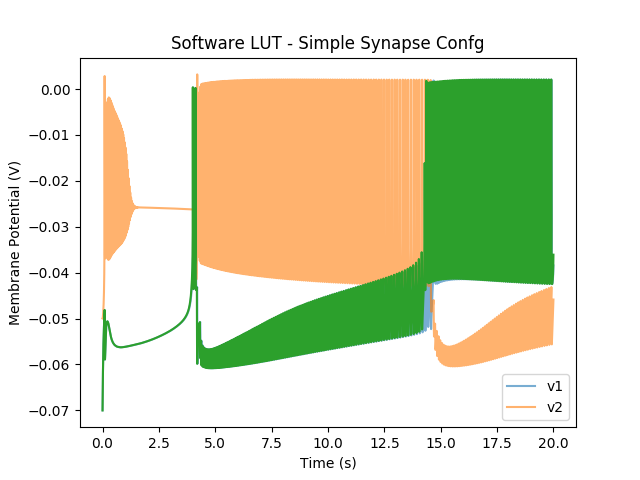

In [40]:
timeIndices = no_lut['time'] < 100
no_lut[['time', 'v1', 'v2']][timeIndices].plot(x='time', alpha=0.6)
# Axis labelling
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title('No LUT - Simple Synapse Confg')
plt.savefig(no_lut_file + '.png', dpi=300)

timeIndices = hard_lut['time'] < 100
hard_lut[['time', 'v1', 'v2']][timeIndices].plot(x='time', alpha=0.6)
# Axis labelling
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title('Hardware LUT - Simple Synapse Confg')
plt.savefig(hard_lut_file + '.png', dpi=300)

timeIndices = soft_lut['time'] < 100
soft_lut[['time', 'v1', 'v2']][timeIndices].plot(x='time', alpha=0.6)
# Axis labelling
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title('Software LUT - Simple Synapse Confg')
plt.savefig(soft_lut_file + '.png', dpi=300)

<IPython.core.display.Javascript object>


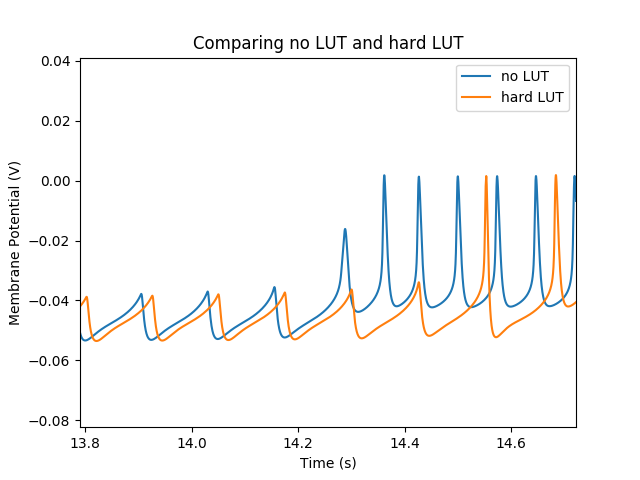

In [45]:
plt.figure()
plt.plot(no_lut['time'].values, no_lut['v1'].values, hard_lut['time'].values, hard_lut['v1'].values)
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title('Comparing no LUT and hard LUT')
plt.legend(['no LUT', 'hard LUT'])
plt.show()

# Comparing Outputs

### Hard LUT compared to No LUT

In [4]:
oc.EvaluateSets(no_lut, hard_lut, cols=['v1', 'v2'])

,Euclid,Supremum,MSE,RMSE,NRMSE
v1,1.34892,0.0536872,9.09799e-05,0.00953834,0.132314
v2,1.74565,0.0572756,0.000152364,0.0123436,0.193914


0


<IPython.core.display.Javascript object>


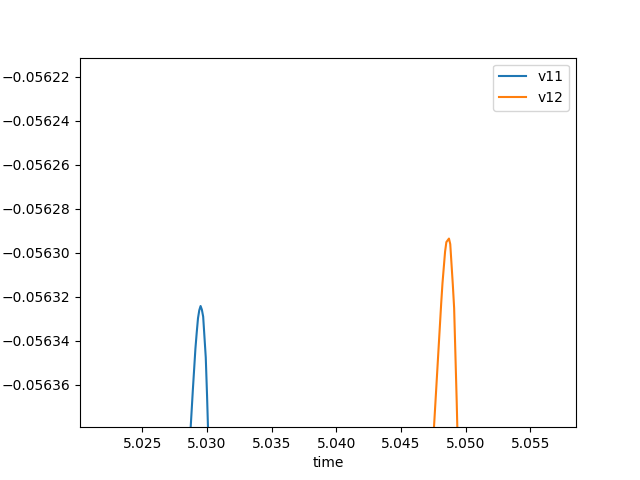

<IPython.core.display.Javascript object>


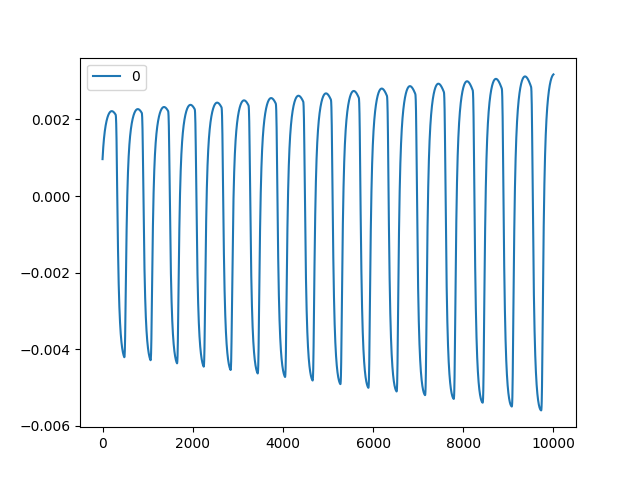

<IPython.core.display.Javascript object>


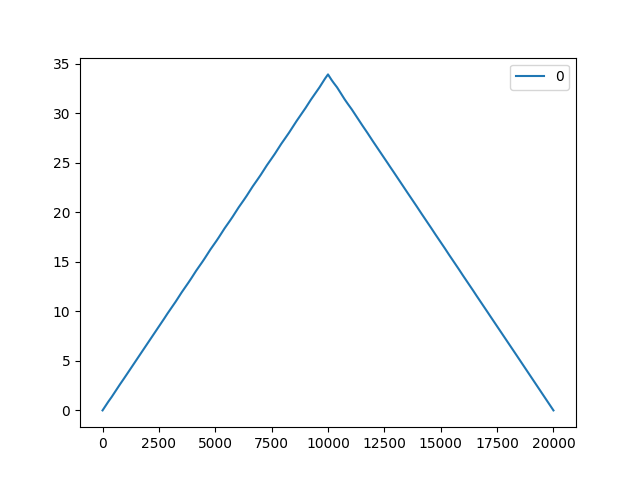

In [24]:
time1 = no_lut['time'].values
time2 = hard_lut['time'].values
v1 = no_lut['v1'].values
v2 = hard_lut['v1'].values

newTime1 = numpy.arange(time1[0], time1[-1], 0.0001)
litteOffset = 0.0000
newTime2 = numpy.arange(time1[0]+litteOffset, time1[-1]+litteOffset, 0.0001)

f1 = interp1d(time1, v1)
f2 = interp1d(time2, v2)

curve1 = f1(newTime1)[50000:60000]
curve2 = f2(newTime2)[50000:60000]
curveTime = newTime1[50000:60000]
crr = correlate(curve1, curve2)

n = len(curve1) - crr.argmax()
n = - curve1.argmax() + curve2.argmax()
n = 0
print(n)
d = {}
d['time'] = curveTime[:len(curveTime) - n]
d['v11'] = curve1[:len(curve1) - n]
d['v12'] = curve2[n:]

pd.DataFrame(data=d).plot(x='time')
pd.DataFrame(d['v11'] - d['v12']).plot()
pd.DataFrame(crr).plot()

<IPython.core.display.Javascript object>


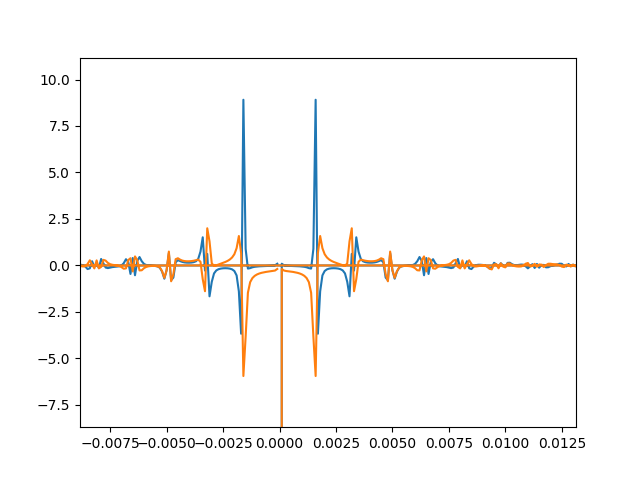

In [22]:
fft1 = numpy.fft.fft(curve1)
fft2 = numpy.fft.fft(curve2)
freq = numpy.fft.fftfreq(len(curve1))
plt.plot(freq, fft1.real, freq, fft2.real)

In [14]:
dumb = bisect_right(time1, 1)
print('{}  {}  {}'.format(dumb, time1[dumb - 1], time1[dumb]))

5091  0.9997587  1.0000229999999999


In [16]:
minTimeStep = no_lut['time'][1] - no_lut['time'][0]
for i in range(2, len(no_lut['time'])):
    timeStep = no_lut['time'][i] - no_lut['time'][i-1]
    if timeStep == 0:
        continue
    minTimeStep = min(minTimeStep, timeStep)
print('{}'.format(minTimeStep))

9.999999994736442e-09


In [6]:
v1_diff = [i - j for i, j in zip(no_lut['v1'], hard_lut['v1'])]
v2_diff = [i - j for i, j in zip(no_lut['v2'], hard_lut['v2'])]
d = [no]
df = pd.DataFrame(data=d, columns=['time','v1','v2'])

NameError: name 'no' is not defined

### Soft LUT compared to No LUT

In [15]:
oc.EvaluateSets(no_lut, soft_lut, cols=['v1', 'v2'])

,Euclid,Supremum,MSE,RMSE,NRMSE
v1,4.2516,0.0595674,0.000202843,0.0142423,0.197526
v2,5.03791,0.0623155,0.000284809,0.0168763,0.264827


### Hard LUT compared to Soft LUT

In [16]:
oc.EvaluateSets(soft_lut, hard_lut, cols=['v1', 'v2'])

,Euclid,Supremum,MSE,RMSE,NRMSE
v1,4.53101,0.0517287,0.000223225,0.0149407,0.207235
v2,5.1479,0.050511,0.000288147,0.0169749,0.266824
